In [1]:
# Tell python where to look for modules. Depending on where you started jupyter, this may not be needed.
import sys
sys.path.append('/Users/gailin.pease/singularity/hourly-egrid/')

In [10]:
import matplotlib.pyplot as plt
from importlib import reload

In [12]:
import src.hourly_egrid
reload(src.hourly_egrid)
from src.hourly_egrid import calc_hourly

import src.pudl
reload(src.pudl)
from src.pudl import PUDL, PUDLConfig

import src.eia
reload(src.eia)
from src.eia import EIA

In [5]:
# Default config may not work from Jupyter because of Jupyter working directory behavior. 
# Instead, explicitly define config and provide full path to pudl sqlite db: 

config = PUDLConfig("../data/pudl-*/pudl_data/parquet/epacems/year={}/state={}/*.parquet", \
                   "sqlite://///Users/gailin.pease/singularity/hourly-egrid/data/pudl-v0.5.0-2021-11-14/pudl_data/sqlite/pudl.sqlite")
P = PUDL(config)

In [6]:
print(P.ba_list)

{'TVA', 'JEA', 'NWMT', 'BANC', 'WALC', 'PGE', 'SEC', 'AVRN', 'CSTO', 'HECO', 'WWA', 'SCL', 'SECI', 'SWPP', 'TPWR', 'MISO', 'GRIS', 'ISNE', 'LGEE', 'CHPD', 'AZPS', 'IID', 'HGMA', 'TAL', 'PNM', 'FMPP', 'GVL', 'FPL', 'PJM', 'FPC', 'YAD', 'GWA', 'NYIS', 'WACM', 'AEC', 'CISO', 'NSB', 'OVEC', 'TIDC', 'SPA', 'NEVP', 'HST', 'SEPA', 'DUK', 'IPCO', 'AECI', 'SRP', 'CPLE', 'PACW', 'BPAT', 'DEAA', 'PSEI', 'NBSO', 'ERCO', 'CPLW', 'GRIF', 'DOPD', 'SCEG', 'PSCO', 'EPE', 'EEI', 'TEPC', 'GCPD', 'SOCO', 'MPS', 'NPPD', 'AVA', 'WAUW', 'TEC', 'LDWP', 'PACE', 'SC'}


In [7]:
hours_cems = calc_hourly(P,"ISNE",2018)

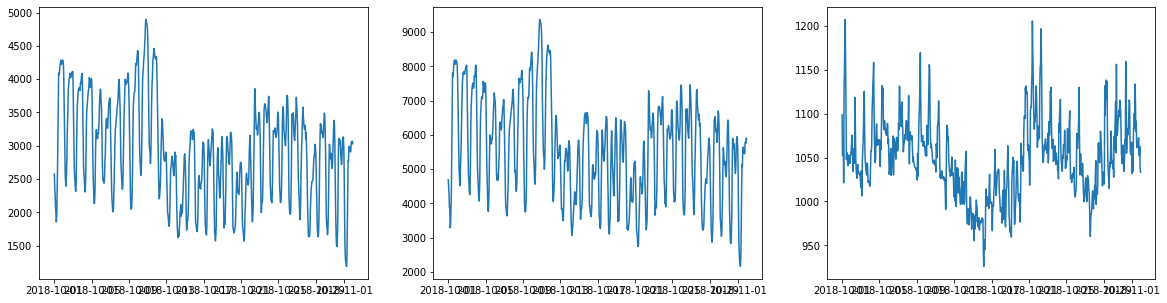

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5))

ax1.plot(hours_cems.loc["2018-10-01":"2018-11-1","co2_mass_tons"])
ax2.plot(hours_cems.loc["2018-10-01":"2018-11-1","gross_load_mw"])
ax3.plot(hours_cems.loc["2018-10-01":"2018-11-1","emission_rate_co2"])


# Compare CEMS net generation to EIA-930 net generation

In [13]:
E = EIA()

In [16]:
hours_eia = E.get_net_generation("ISNE", 2018)

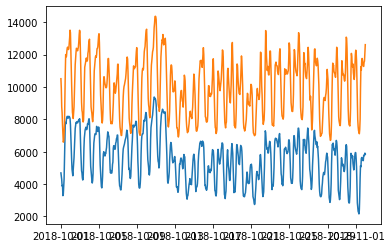

In [17]:
fig, ax1 = plt.subplots(1)
# MW reported hourly -- I think this ends up being MWH? 
ax1.plot(hours_cems.loc["2018-10-01":"2018-11-1","gross_load_mw"])
# MWH 
ax1.plot(hours_eia["2018-10-01":"2018-11-1"])